**Predicting median price of homes in Boston suburb in mid-1970s given various features like Crime Rate,Property Tax Rate,Highway accessibility , Number of Rooms etc.**

In [1]:
#Dataset loading
from keras.datasets import boston_housing
(train_data,train_labels),(test_data,test_labels)=boston_housing.load_data()


57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# Dataset Exploration
print(f'Total data points :  {train_data.shape[0] + test_data.shape[0]}')
print(f'training data shape : {train_data.shape}')
print(f'test_data shape : {test_data.shape}')
print(f'Min range of training House Price : ${min(train_labels)}000')
print(f'Max range of training Price : ${max(train_labels)}000')

Total data points :  506
training data shape : (404, 13)
test_data shape : (102, 13)
Min range of training House Price : $5.0000
Max range of training Price : $50.0000


In [ ]:
train_data

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [3]:
#Normalization of Data
mean=train_data.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0)
train_data/=std
test_data-=mean
test_data/=std

In [4]:
from keras import models
from keras import layers
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64,activation = 'relu',input_shape = (13,)))
  model.add(layers.Dense(64,activation = 'relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer = 'rmsprop',loss = 'mse',metrics=['mae'])
  return model


In [10]:
#k-fold Cross Validation
import numpy as np
k = 4
val_samples = len(train_data)//k
num_epochs = 200
all_mae_scores = []

for i in range(k):
  print(f'processing {i}th fold')
  val_data = train_data[i*val_samples : (i+1)*val_samples]
  val_targets = train_labels[i*val_samples:(i+1)*val_samples]

  partial_train_data = np.concatenate([train_data[:i*val_samples],
                                       train_data[(i+1)*val_samples:]],
                                      axis = 0)
  partial_train_labels = np.concatenate([train_labels[:i*val_samples],
                                         train_labels[(i+1)*val_samples:]],
                                        axis = 0)

  model = build_model()
  history = model.fit(partial_train_data,partial_train_labels,validation_data = (val_data,val_targets),epochs = num_epochs,batch_size = 1)
  mae_history = history.history['val_mae']
  all_mae_scores.append(mae_history)



processing 0th fold
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 354.9809 - mae: 15.7669 - val_loss: 36.7967 - val_mae: 3.9454
Epoch 2/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 43.9257 - mae: 4.3582 - val_loss: 24.4970 - val_mae: 3.0168
Epoch 3/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19.3112 - mae: 3.0465 - val_loss: 20.7967 - val_mae: 2.9655
Epoch 4/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19.1177 - mae: 3.0222 - val_loss: 17.5042 - val_mae: 2.6624
Epoch 5/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.8128 - mae: 2.5985 - val_loss: 16.3639 - val_mae: 2.8070
Epoch 6/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.9608 - mae: 2.6474 - val_loss: 16.8117 - val_mae: 2.9667
Epoch 7/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.5153 - mae: 2.5056 - val_loss: 13.6935 - val_mae: 2.6104
Epoch 8/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.0221 - mae: 2.4045 - val_loss: 11.9906 - val_mae: 2.3601
Epoch 9/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 1

In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [12]:
average_mae_history = [np.mean([x[i] for x in all_mae_scores]) for i in range(num_epochs)]
#average_mae_history


[4.641877770423889,
 3.324010193347931,
 3.114276945590973,
 2.808171033859253,
 2.865946054458618,
 2.7950077056884766,
 2.8097795248031616,
 2.6092162132263184,
 2.6792585253715515,
 2.758526086807251,
 2.6073588728904724,
 2.7199084162712097,
 2.6700578331947327,
 2.693442940711975,
 2.55916565656662,
 2.5625780820846558,
 2.5473945140838623,
 2.4420047998428345,
 2.447080969810486,
 2.5402724146842957,
 2.509425640106201,
 2.550268828868866,
 2.371913820505142,
 2.4632105231285095,
 2.6073344349861145,
 2.4860412776470184,
 2.4134795665740967,
 2.5389803051948547,
 2.4657700061798096,
 2.4849478006362915,
 2.554910182952881,
 2.4359126687049866,
 2.3903180062770844,
 2.5904555916786194,
 2.494215428829193,
 2.4358495473861694,
 2.4877843260765076,
 2.460620105266571,
 2.3723870515823364,
 2.410897731781006,
 2.3647345304489136,
 2.4522868394851685,
 2.5295664072036743,
 2.332583427429199,
 2.3506866693496704,
 2.4717493057250977,
 2.5899198055267334,
 2.4964349269866943,
 2.4667593

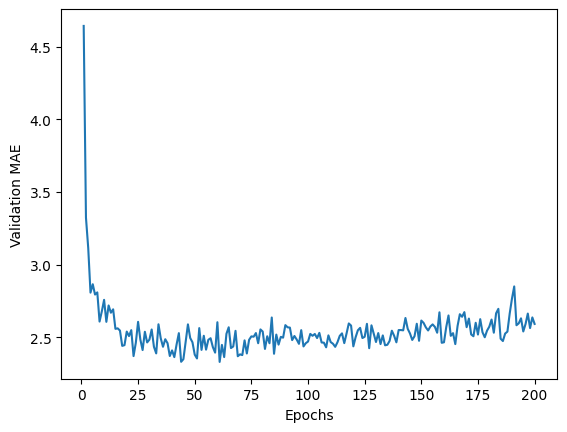

In [13]:
import matplotlib.pyplot as plotter
plotter.plot(range(1,len(average_mae_history)+1),average_mae_history)
plotter.xlabel('Epochs')
plotter.ylabel('Validation MAE')
plotter.show()

*Omit the First 10 Data samples *
*Replace each point with an exponential moving average of previous points to obtan smooth curve*

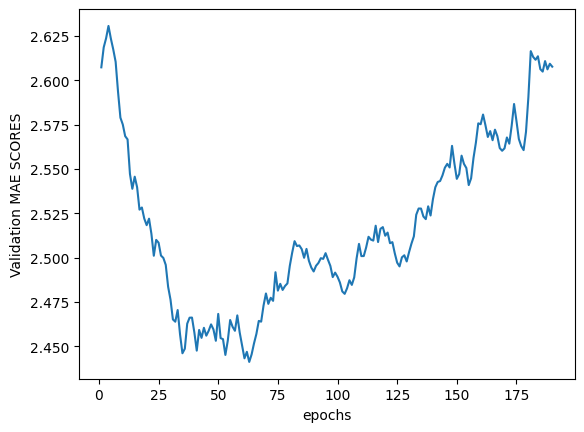

In [14]:
def curve_smooth(points,factor = 0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous*factor + point * (1-factor))

    else:
       smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = curve_smooth(average_mae_history[10:])
plotter.plot(range(1,len(smooth_mae_history)+1), smooth_mae_history)
plotter.xlabel('epochs')
plotter.ylabel('Validation MAE SCORES')
plotter.show()


According to this plot,Validation MAE hits its best score at somewhere between 60 and 70 epoch range. After that, it start overfitting.

In [15]:
#Training the final Production Model
model = build_model()
model.fit(train_data,train_labels,epochs = 65,batch_size = 16)
test_mse_score ,test_mae_score = model.evaluate(test_data,test_labels)
test_mae_score

Epoch 1/65


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 520.5908 - mae: 21.0553
Epoch 2/65
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 377.4673 - mae: 17.3878 
Epoch 3/65
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 227.2604 - mae: 12.5973
Epoch 4/65
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 86.9155 - mae: 7.2442
Epoch 5/65
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52.3555 - mae: 5.1882 
Epoch 6/65
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.2115 - mae: 4.0445 
Epoch 7/65
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.6477 - mae: 3.7594 
Epoch 8/65
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.9848 - mae: 3.2031 
Epoch 9/65
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.5856 - mae: 3.1302 
Epoch 10/65
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.0729 - mae: 2.8758 
Epoch 11/65
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.7113 - mae: 2.7486
Epoch 12/65
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.9502 - mae: 2.7917 
Epoch 13/65
26/26 ━━━━━━━━━━━━━━━

2.774155855178833

**We are still off by $2700 in predicting Boston House Price Prediction **